In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [256]:
df = pd.read_csv('C:\\Users\\bibs2091\\Desktop\\AI\\arabic_names_with_gender.csv')


In [257]:
df.tail()


,gender,name
6344,ذكر,دريمى
6345,ذكر,مغيره
6346,انثى,نفاذه
6347,ذكر,جودة
6348,ذكر,ابوخيشة


In [258]:
df.shape

(6349, 2)

In [259]:
df.dtypes

gender    object
name      object
dtype: object

In [260]:
df=df.drop(df[df['name'].isnull()].index)
#remove the null values

In [261]:
df[df.gender == 'ذكر'].shape

(4960, 2)

In [262]:
df[df.gender == 'انثى'].shape

(1388, 2)

In [263]:
names= df
names.gender.replace({'ذكر':1 , 'انثى':0},inplace=True)
#replace the genders with boolean 1 and 0

In [264]:
names.tail()

,gender,name
6344,1,دريمى
6345,1,مغيره
6346,0,نفاذه
6347,1,جودة
6348,1,ابوخيشة


In [345]:
#to transfer the chars to numbers, check it to get what i did ( per example ة and ت are separted cuz it helps in arabic gender classification)
# Ijust think that most of male names ends with ت, but ة is for girls  ( this is just how I think, I should visualize that , I'll do that in later commits)
letter_dict={'ا':1,'ب':2,'ت':3,'ث':4,'ج':5,'ح':6,'خ':7,'د':8,'ذ':9,'ر':10,'ز':11,'س':12,'ش':13,'ص':14,'ض':15,'ط':16,'ظ':17,'ع':18,'غ':19,'ف':20,'ق':21,'ك':22,'ل':23,'م':24,'ن':25,'ه':29,'و':27,'ؤ':27,'ي':28,'ء':30,'ئ':28,'-':0,'أ':1,'ة':29,'،':0,'.':0,'ى':28}

In [356]:
names['name']= names['name'].apply(lambda x: ''.join(filter(str.isalnum, x))) #removes spaces, special characters ... 
names['name']= names['name'].apply(lambda x: x.replace("ـ", "")); #to resolve an issue with the dataset, just jump, it isn't that important
names['last_letter']=  names.name.str[-1]
names['second_last_letter']=  names.name.str[-2]
names['third_last_letter']=  names['name'].apply(lambda x: x[-3] if len(x) > 2 else "-"); #if the name shorter than 2 letters is will be replaced with - eventually with 0 



In [357]:
#remove the null rows
names=names.drop(names[names['last_letter'].isnull()].index)
names=names.drop(names[names['second_last_letter'].isnull()].index)

#convert the letters to numbers 
names['last_letter']= names['last_letter'].apply(lambda x:letter_dict[x] )
names['second_last_letter']= names['second_last_letter'].apply(lambda x:letter_dict[x] )
names['third_last_letter']= names['third_last_letter'].apply(lambda x:letter_dict[x] )

In [358]:
names = names.drop_duplicates('name') #keep only the unique names 

In [359]:
#I already know that arabic names with ابو and عبد are mostly for males, so I think this will help me identifying males 
names['abo']=   names['name'].apply(lambda x: 1 if 'ابو' in x else 0) 
names['abd']=   names['name'].apply(lambda x: 1 if 'عبد' in x else 0)


In [360]:
names.shape


(6152, 7)

In [361]:
x=names[['last_letter','second_last_letter','third_last_letter','abo','abd']] #the features
y=names[['gender']] 


In [362]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)
#split the data set into training and testing set

C:\Users\bibs2091\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bibs2091\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


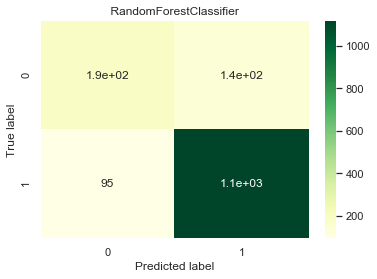

the accuracy score for Random Forest Classifier is : 0.8478543563068921
the f1 score for Random Forest Classifier is : 0.9051863857374391
the precision score is : 0.8893312101910829
the recall score is : 0.9216171617161716


In [366]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns       
from sklearn.metrics import accuracy_score, make_scorer,f1_score, precision_score, recall_score, confusion_matrix

#I'll use random forest ( I already tried some algorithms and this is the best)
model = RandomForestClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="YlGn")
plt.title(' RandomForestClassifier ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("the accuracy score for Random Forest Classifier is :",(accuracy_score(y_test, predictions)))
print("the f1 score for Random Forest Classifier is :",(f1_score(y_test, predictions)))
print("the precision score is :",(precision_score(y_test, predictions)))
print("the recall score is :",(recall_score(y_test, predictions))) 


In [367]:

#predict the gender of an arabic name
def predict(model,name):
    letter_dict={'ا':1,'ب':2,'ت':3,'ث':4,'ج':5,'ح':6,'خ':7,'د':8,'ذ':9,'ر':10,'ز':11,'س':12,'ش':13,'ص':14,'ض':15,'ط':16,'ظ':17,'ع':18,'غ':19,'ف':20,'ق':21,'ك':22,'ل':23,'م':24,'ن':25,'ه':29,'و':27,'ؤ':27,'ي':28,'ء':30,'ئ':28,'-':0,'أ':1,'ة':29,'،':0,'\u200f':0,'.':0,'\t':0,'ى':28}
    if (len(name)>2):
        third_letter=name[-3]
    else:
        third_letter="-"
    if (model.predict([[letter_dict[name[-1]],letter_dict[name[-2]],letter_dict[third_letter],0,0]])):
        return "Male"
    else:
        return "Female"    

In [382]:
#let's try out some names!!

print(predict(model,"محمد"))
print(predict(model,"كوثر"))
print(predict(model,"لؤي"))
print(predict(model,"اسراء"))
print(predict(model,"اخلاص"))
print(predict(model,"وليد"))
print(predict(model,"تولين"))
print(predict(model,"امال"))
print(predict(model,"الاخضر"))
print(predict(model,"حمادة"))
print(predict(model,"فادي"))
print(predict(model,"ثابت"))
print(predict(model,"خلود"))
print(predict(model,"ياسمين"))
print(predict(model,"رنيم"))
print(predict(model,"بتول"))
print(predict(model,"قدور"))
print(predict(model,"حمودة"))

Male
Female
Male
Female
Male
Male
Female
Male
Male
Female
Male
Male
Female
Female
Female
Female
Male
Male
Female
